In [ ]:
import pandas as pd


In [ ]:
data=pd.read_csv("/content/insurance.csv")

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data['sex'] = data['sex'].map({'female': 0, 'male': 1})
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})

In [ ]:
data = pd.get_dummies(data, columns=['region'], drop_first=True)


In [ ]:
data['bmi'] = data['bmi'].fillna(data['bmi'].median())
data['smoker'] = data['smoker'].fillna(data['smoker'].mode()[0])
data['expenses'] = data['expenses'].fillna(data['expenses'].median())

data['region_northwest'] = data['region_northwest'].fillna(False)
data['region_southeast'] = data['region_southeast'].fillna(False)
data['region_southwest'] = data['region_southwest'].fillna(False)

data['region_northwest'] = data['region_northwest'].astype(int)
data['region_southeast'] = data['region_southeast'].astype(int)
data['region_southwest'] = data['region_southwest'].astype(int)


In [ ]:
data.head()

,age,sex,bmi,children,smoker,expenses,region_northwest,region_southeast,region_southwest
0,19,0,27.9,0,1,16884.92,0,0,1
1,18,1,33.8,1,0,1725.55,0,1,0
2,28,1,33.0,3,0,4449.46,0,1,0
3,33,1,22.7,0,0,21984.47,1,0,0
4,32,1,28.9,0,0,3866.86,1,0,0


In [ ]:
data.tail()

,age,sex,bmi,children,smoker,expenses,region_northwest,region_southeast,region_southwest
1333,50,1,31.0,3,0,10600.55,1,0,0
1334,18,0,31.9,0,0,2205.98,0,0,0
1335,18,0,36.9,0,0,1629.83,0,1,0
1336,21,0,25.8,0,0,2007.95,0,0,1
1337,61,0,29.1,0,1,29141.36,1,0,0


In [ ]:
data.describe()

,age,sex,bmi,children,smoker,expenses,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.665471,1.094918,0.204783,13270.422414,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098382,1.205493,0.403694,12110.011240,0.428995,0.445181,0.428995
min,18.000000,0.000000,16.000000,0.000000,0.000000,1121.870000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.300000,0.000000,0.000000,4740.287500,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.030000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,16639.915000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.100000,5.000000,1.000000,63770.430000,1.000000,1.000000,1.000000


In [ ]:
age=data['age'].tolist()
sex=data['sex'].tolist()
bmi=data['bmi'].tolist()
children=data['children'].tolist()
smoker=data['smoker'].tolist()
region_northwest=data['region_northwest'].tolist()
expenses=data['expenses'].tolist()

In [ ]:
print(age)

[19, 18, 28, 33, 32, 31, 46, 37, 37, 60, 25, 62, 23, 56, 27, 19, 52, 23, 56, 30, 60, 30, 18, 34, 37, 59, 63, 55, 23, 31, 22, 18, 19, 63, 28, 19, 62, 26, 35, 60, 24, 31, 41, 37, 38, 55, 18, 28, 60, 36, 18, 21, 48, 36, 40, 58, 58, 18, 53, 34, 43, 25, 64, 28, 20, 19, 61, 40, 40, 28, 27, 31, 53, 58, 44, 57, 29, 21, 22, 41, 31, 45, 22, 48, 37, 45, 57, 56, 46, 55, 21, 53, 59, 35, 64, 28, 54, 55, 56, 38, 41, 30, 18, 61, 34, 20, 19, 26, 29, 63, 54, 55, 37, 21, 52, 60, 58, 29, 49, 37, 44, 18, 20, 44, 47, 26, 19, 52, 32, 38, 59, 61, 53, 19, 20, 22, 19, 22, 54, 22, 34, 26, 34, 29, 30, 29, 46, 51, 53, 19, 35, 48, 32, 42, 40, 44, 48, 18, 30, 50, 42, 18, 54, 32, 37, 47, 20, 32, 19, 27, 63, 49, 18, 35, 24, 63, 38, 54, 46, 41, 58, 18, 22, 44, 44, 36, 26, 30, 41, 29, 61, 36, 25, 56, 18, 19, 39, 45, 51, 64, 19, 48, 60, 27, 46, 28, 59, 35, 63, 40, 20, 40, 24, 34, 45, 41, 53, 27, 26, 24, 34, 53, 32, 19, 42, 55, 28, 58, 41, 47, 42, 59, 19, 59, 39, 40, 18, 31, 19, 44, 23, 33, 55, 40, 63, 54, 60, 24, 19, 29,

In [ ]:
print(sex)

[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 

In [ ]:
print(bmi)

[27.9, 33.8, 33.0, 22.7, 28.9, 25.7, 33.4, 27.7, 29.8, 25.8, 26.2, 26.3, 34.4, 39.8, 42.1, 24.6, 30.8, 23.8, 40.3, 35.3, 36.0, 32.4, 34.1, 31.9, 28.0, 27.7, 23.1, 32.8, 17.4, 36.3, 35.6, 26.3, 28.6, 28.3, 36.4, 20.4, 33.0, 20.8, 36.7, 39.9, 26.6, 36.6, 21.8, 30.8, 37.1, 37.3, 38.7, 34.8, 24.5, 35.2, 35.6, 33.6, 28.0, 34.4, 28.7, 37.0, 31.8, 31.7, 22.9, 37.3, 27.4, 33.7, 24.7, 25.9, 22.4, 28.9, 39.1, 26.3, 36.2, 24.0, 24.8, 28.5, 28.1, 32.0, 27.4, 34.0, 29.6, 35.5, 39.8, 33.0, 26.9, 38.3, 37.6, 41.2, 34.8, 22.9, 31.2, 27.2, 27.7, 27.0, 39.5, 24.8, 29.8, 34.8, 31.3, 37.6, 30.8, 38.3, 20.0, 19.3, 31.6, 25.5, 30.1, 29.9, 27.5, 28.0, 28.4, 30.9, 27.9, 35.1, 33.6, 29.7, 30.8, 35.7, 32.2, 28.6, 49.1, 27.9, 27.2, 23.4, 37.1, 23.8, 29.0, 31.4, 33.9, 28.8, 28.3, 37.4, 17.8, 34.7, 26.5, 22.0, 35.9, 25.6, 28.8, 28.1, 34.1, 25.2, 31.9, 36.0, 22.4, 32.5, 25.3, 29.7, 28.7, 38.8, 30.5, 37.7, 37.4, 28.4, 24.1, 29.7, 37.1, 23.4, 25.5, 39.5, 24.4, 25.2, 35.5, 27.8, 26.6, 36.9, 39.6, 29.8, 29.6, 28.2, 37.

In [ ]:
print(children)
print(smoker)
print(region_northwest)
print(expenses)

[0, 1, 3, 0, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 3, 0, 2, 1, 2, 0, 0, 5, 0, 1, 0, 3, 0, 1, 0, 0, 2, 1, 2, 1, 0, 2, 0, 0, 1, 0, 2, 1, 0, 3, 2, 2, 2, 1, 2, 3, 4, 1, 1, 0, 0, 2, 1, 0, 3, 0, 5, 3, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 4, 2, 2, 0, 0, 0, 0, 0, 1, 3, 2, 2, 1, 3, 0, 0, 0, 0, 0, 0, 3, 1, 1, 1, 2, 0, 0, 1, 2, 0, 0, 3, 0, 0, 1, 0, 2, 2, 0, 0, 1, 3, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 2, 1, 2, 2, 3, 3, 3, 1, 1, 1, 1, 0, 3, 0, 1, 0, 0, 0, 0, 3, 0, 0, 1, 2, 0, 4, 5, 3, 1, 3, 0, 0, 0, 1, 0, 0, 2, 1, 2, 3, 0, 0, 3, 0, 2, 3, 2, 3, 1, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 1, 4, 2, 1, 2, 2, 0, 0, 1, 0, 1, 0, 3, 0, 0, 3, 0, 0, 1, 2, 1, 3, 0, 1, 2, 2, 0, 2, 0, 1, 2, 1, 1, 3, 0, 0, 0, 0, 1, 1, 2, 2, 2, 3, 0, 3, 0, 0, 4, 0, 0, 1, 3, 0, 3, 3, 1, 3, 1, 1, 1, 2, 2, 1, 0, 2, 2, 0, 2, 1, 1, 3, 1, 1, 0, 1, 2, 0, 1, 3, 0, 1, 2, 0, 3, 0, 0, 1, 3, 1, 3, 3, 2, 2, 2, 2, 2, 1, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 4, 0, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 

In [ ]:
data_matrix = data[['age', 'bmi', 'expenses']].to_numpy()

In [ ]:
print(data_matrix)

[[1.900000e+01 2.790000e+01 1.688492e+04]
 [1.800000e+01 3.380000e+01 1.725550e+03]
 [2.800000e+01 3.300000e+01 4.449460e+03]
 ...
 [1.800000e+01 3.690000e+01 1.629830e+03]
 [2.100000e+01 2.580000e+01 2.007950e+03]
 [6.100000e+01 2.910000e+01 2.914136e+04]]


In [ ]:
data_list = {
    'age': age,
    'sex': sex,
    'bmi': bmi,
    'children': children,
    'smoker': smoker,
    'region': region,
    'expenses': expenses
}



In [ ]:
print("\nMatrix:\n", data_matrix)
print("\nList:\n", data_list)


Matrix:
 [[1.900000e+01 2.790000e+01 1.688492e+04]
 [1.800000e+01 3.380000e+01 1.725550e+03]
 [2.800000e+01 3.300000e+01 4.449460e+03]
 ...
 [1.800000e+01 3.690000e+01 1.629830e+03]
 [2.100000e+01 2.580000e+01 2.007950e+03]
 [6.100000e+01 2.910000e+01 2.914136e+04]]

List:
 {'age': [19, 18, 28, 33, 32, 31, 46, 37, 37, 60, 25, 62, 23, 56, 27, 19, 52, 23, 56, 30, 60, 30, 18, 34, 37, 59, 63, 55, 23, 31, 22, 18, 19, 63, 28, 19, 62, 26, 35, 60, 24, 31, 41, 37, 38, 55, 18, 28, 60, 36, 18, 21, 48, 36, 40, 58, 58, 18, 53, 34, 43, 25, 64, 28, 20, 19, 61, 40, 40, 28, 27, 31, 53, 58, 44, 57, 29, 21, 22, 41, 31, 45, 22, 48, 37, 45, 57, 56, 46, 55, 21, 53, 59, 35, 64, 28, 54, 55, 56, 38, 41, 30, 18, 61, 34, 20, 19, 26, 29, 63, 54, 55, 37, 21, 52, 60, 58, 29, 49, 37, 44, 18, 20, 44, 47, 26, 19, 52, 32, 38, 59, 61, 53, 19, 20, 22, 19, 22, 54, 22, 34, 26, 34, 29, 30, 29, 46, 51, 53, 19, 35, 48, 32, 42, 40, 44, 48, 18, 30, 50, 42, 18, 54, 32, 37, 47, 20, 32, 19, 27, 63, 49, 18, 35, 24, 63, 38, 54, 46,

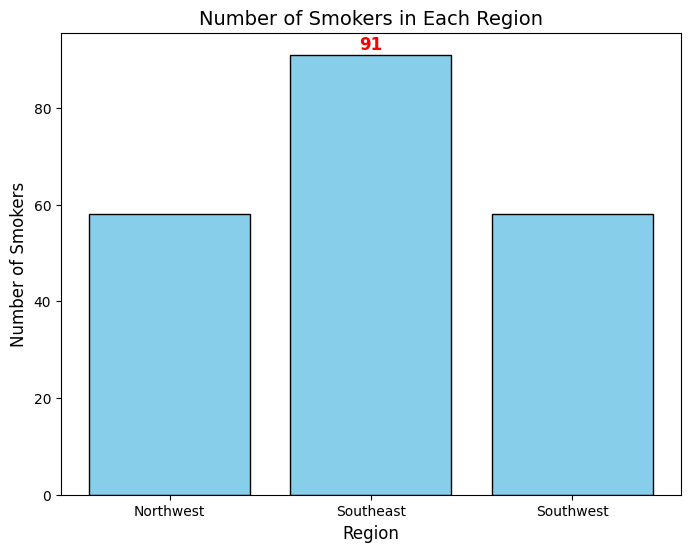

In [ ]:
import matplotlib.pyplot as plt

smokers_northwest = (data['region_northwest'] == 1) & (data['smoker'] == 1)
smokers_southeast = (data['region_southeast'] == 1) & (data['smoker'] == 1)
smokers_southwest = (data['region_southwest'] == 1) & (data['smoker'] == 1)

region_smoker_count = {
    'Northwest': smokers_northwest.sum(),
    'Southeast': smokers_southeast.sum(),
    'Southwest': smokers_southwest.sum()
}

regions = list(region_smoker_count.keys())
smokers = list(region_smoker_count.values())

plt.figure(figsize=(8, 6))
plt.bar(regions, smokers, color='skyblue', edgecolor='black')

plt.title('Number of Smokers in Each Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Smokers', fontsize=12)

max_smokers_region = max(region_smoker_count, key=region_smoker_count.get)
max_smokers_count = region_smoker_count[max_smokers_region]
plt.text(max_smokers_region, max_smokers_count + 1, f'{max_smokers_count}',
         ha='center', color='red', fontsize=12, fontweight='bold')

# Show the plot
plt.show()


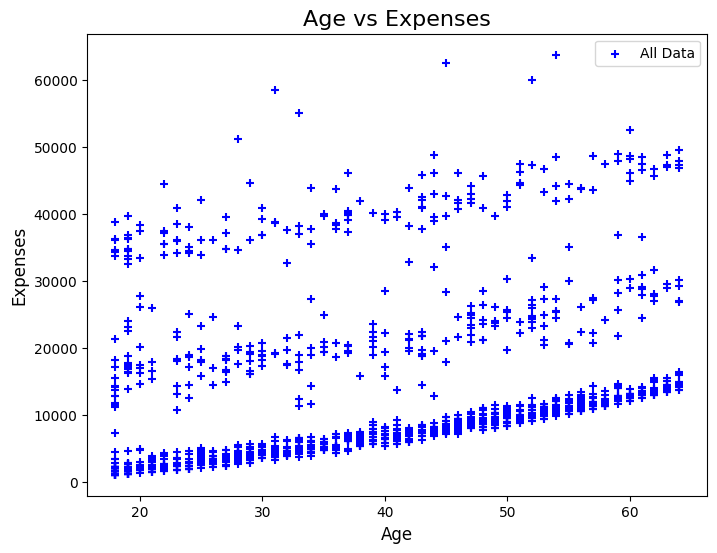

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['age'], data['expenses'], color='blue', marker='+', label='All Data')
plt.title('Age vs Expenses', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Expenses', fontsize=12)

plt.legend()
plt.show()


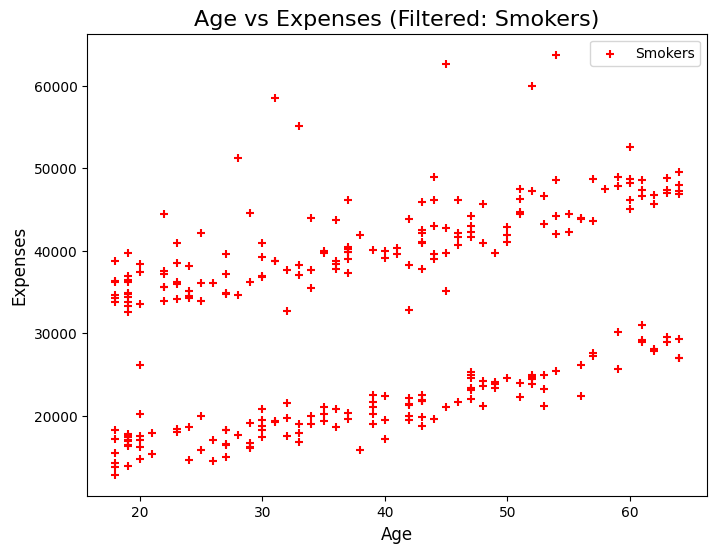

In [ ]:
filtered_data = data[data['smoker'] == 1]
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['age'], filtered_data['expenses'], color='red', marker='+', label='Smokers')
plt.title('Age vs Expenses (Filtered: Smokers)', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Expenses', fontsize=12)

plt.legend()
plt.show()


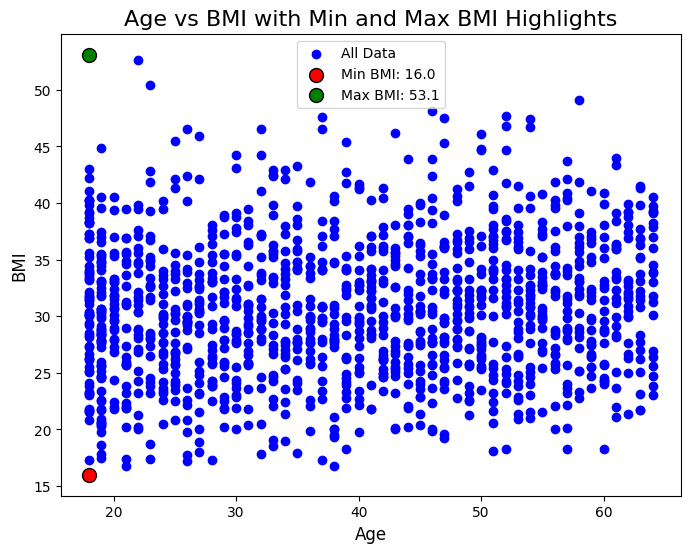

In [ ]:
min_bmi = data['bmi'].min()
max_bmi = data['bmi'].max()

min_bmi_data = data[data['bmi'] == min_bmi]
max_bmi_data = data[data['bmi'] == max_bmi]

plt.figure(figsize=(8, 6))

plt.scatter(data['age'], data['bmi'], color='blue', label='All Data')


plt.scatter(min_bmi_data['age'], min_bmi_data['bmi'], color='red', label=f'Min BMI: {min_bmi}', s=100, edgecolors='black')
plt.scatter(max_bmi_data['age'], max_bmi_data['bmi'], color='green', label=f'Max BMI: {max_bmi}', s=100, edgecolors='black')

plt.title('Age vs BMI with Min and Max BMI Highlights', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('BMI', fontsize=12)

plt.legend()

# Show the plot
plt.show()

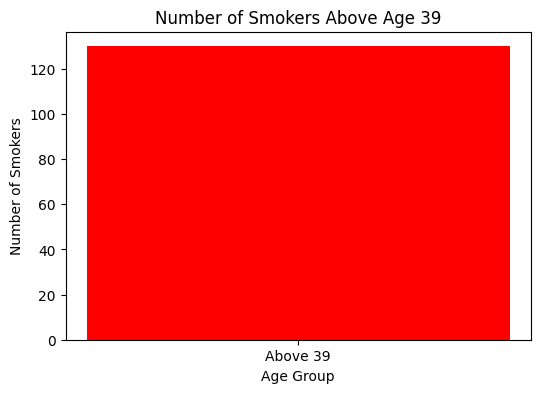

In [ ]:
#Smokers Above and Below Age 39:
above_39_smokers = data[(data['age'] > 39) & (data['smoker'] == 1)]
below_39_smokers = data[(data['age'] <= 39) & (data['smoker'] == 1)]


count_above_39_smokers = above_39_smokers.shape[0]
count_below_39_smokers = below_39_smokers.shape[0]


plt.figure(figsize=(6, 4))
plt.bar(['Above 39'], [count_above_39_smokers], color='red')


plt.title('Number of Smokers Above Age 39', fontsize=12)
plt.xlabel('Age Group', fontsize=10)
plt.ylabel('Number of Smokers', fontsize=10)

plt.show()

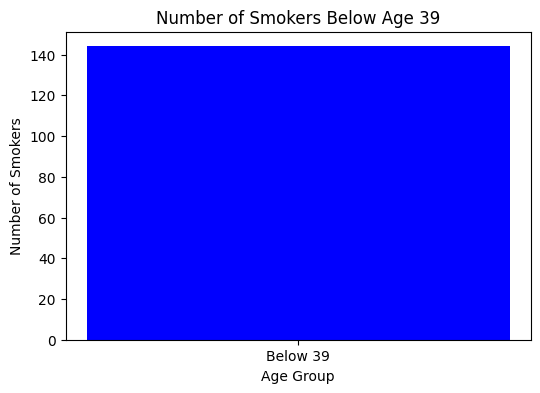

In [ ]:
#Smokers below or equal to age 39
plt.figure(figsize=(6, 4))
plt.bar(['Below 39'], [count_below_39_smokers], color='blue')


plt.title('Number of Smokers Below Age 39', fontsize=12)
plt.xlabel('Age Group', fontsize=10)
plt.ylabel('Number of Smokers', fontsize=10)

plt.show()

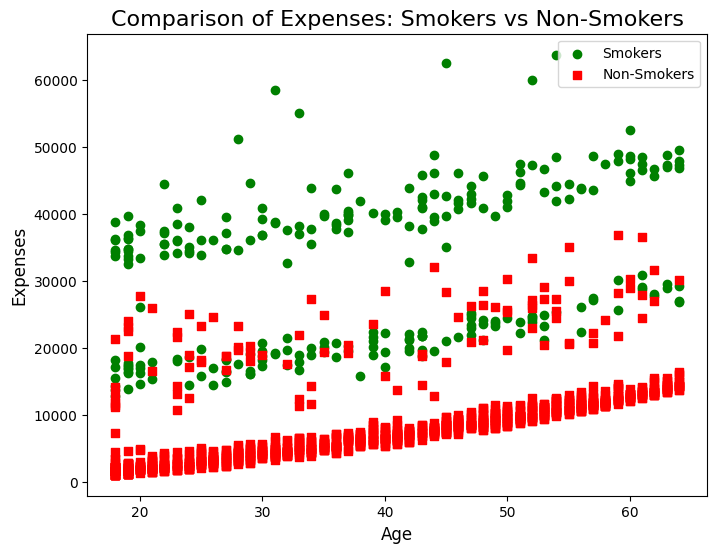

In [114]:
smokers = data[data['smoker'] == 1]
non_smokers = data[data['smoker'] == 0]

plt.figure(figsize=(8, 6))

plt.scatter(smokers['age'], smokers['expenses'], color='green', marker='o', label='Smokers')

plt.scatter(non_smokers['age'], non_smokers['expenses'], color='red', marker='s', label='Non-Smokers')

plt.title('Comparison of Expenses: Smokers vs Non-Smokers', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Expenses', fontsize=12)

plt.legend()
plt.show()


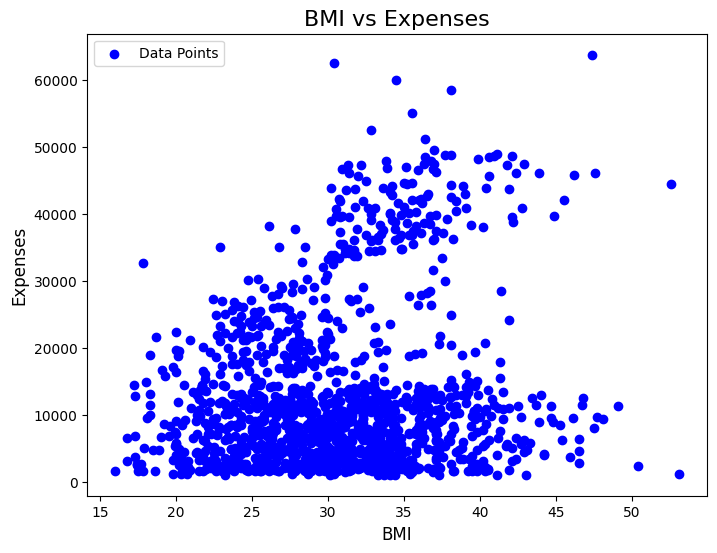

In [115]:
# Create a scatter plot for BMI vs Expenses
plt.figure(figsize=(8, 6))

plt.scatter(data['bmi'], data['expenses'], color='blue', marker='o', label='Data Points')

plt.title('BMI vs Expenses', fontsize=16)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Expenses', fontsize=12)

plt.legend()

plt.show()